getwd()

In [2]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #  
# # # # # # # # #  Install janitor and lubridate packages for cleaning and date functions # # # # # # # # # 
# # # # # # # # #  skimr summarizes statistics about columns in a data frame              # # # # # # # # # 
# # # # # # # # #  tidyverse for data import and wrangling                                # # # # # # # # # 
# # # # # # # # #  readr for reading rectangular data                                     # # # # # # # # # 
# # # # # # # # #  ggplot for visualization                                               # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # ## # # # # # # # ## # # # # # # # #

In [3]:
install.packages('janitor')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
install.packages('lubridate')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [ ]:
install.packages('dtplyr')

In [6]:
library(tidyverse)
library(skimr)
library(dplyr)
library(dtplyr)
library(lubridate)
library(janitor)
library(tidyr)
library(tibble)
library(stringr)
library(readr)
library(ggplot2)

In [7]:
#--------------------------------------------------------------------------------
# STEP # 1 EXPECTATION: COLLECTION AND LOAD OF DATA FROM APRIL 2004 - MAY 2021
#--------------------------------------------------------------------------------

In [8]:
trip202004 <- read_csv('202004-divvy-tripdata.csv')
trip202005 <- read_csv('202005-divvy-tripdata.csv')
trip202006 <- read_csv('202006-divvy-tripdata.csv')
trip202007 <- read_csv('202007-divvy-tripdata.csv')
trip202008 <- read_csv('202008-divvy-tripdata.csv')
trip202009 <- read_csv('202009-divvy-tripdata.csv')
trip202010 <- read_csv('202010-divvy-tripdata.csv')
trip202011 <- read_csv('202011-divvy-tripdata.csv')
trip202012 <- read_csv('202012-divvy-tripdata.csv')

Rows: 84776 Columns: 13── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at
ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.Rows: 200274 Columns: 13── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at
ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.Rows: 343005 Columns: 13── Column specification ─────────────────────────

In [10]:
trip202101 <- read_csv('202101-divvy-tripdata.csv')
trip202102 <- read_csv('202102-divvy-tripdata.csv')
trip202103 <- read_csv('202103-divvy-tripdata.csv')
trip202104 <- read_csv('202104-divvy-tripdata.csv')
trip202105 <- read_csv('202105-divvy-tripdata.csv')


Rows: 96834 Columns: 13── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at
ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.Rows: 49622 Columns: 13── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at
ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.Rows: 228496 Columns: 13── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_i

In [11]:
#--------------------------------------------------------------------------
# STEP # 2 EXPECTATION: COMBINE OR MERGE ALL THE DATA TO A SINGLE FILE
#--------------------------------------------------------------------------

In [12]:
riders_trip <- rbind(trip202004, trip202005, trip202006, trip202007,
               trip202008, trip202009, trip202010, trip202011, 
               trip202012, trip202101, trip202102, trip202103, 
               trip202104, trip202105)

In [15]:
# View table or data frame
head(riders_trip)
tail(riders_trip)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
D0B8E59E2B3C406D,electric_bike,2021-05-02 17:48:17,2021-05-02 17:52:19,Blackstone Ave & Hyde Park Blvd,13398,NA,NA,41.80259,-87.59031,41.80000,-87.60000,member
EF56D7D1D612AC11,electric_bike,2021-05-20 16:32:14,2021-05-20 16:35:39,Blackstone Ave & Hyde Park Blvd,13398,NA,NA,41.80258,-87.59023,41.80000,-87.60000,member
745191CB9F21DE3C,classic_bike,2021-05-29 16:40:37,2021-05-29 17:22:37,Sheridan Rd & Montrose Ave,TA1307000107,Michigan Ave & Oak St,13042,41.96167,-87.65464,41.90096,-87.62378,casual
428575BAA5356BFF,electric_bike,2021-05-31 14:24:54,2021-05-31 14:31:38,Sheridan Rd & Montrose Ave,TA1307000107,NA,NA,41.96152,-87.65465,41.95000,-87.65000,member
FC8A4A7AB7249662,electric_bike,2021-05-25 16:01:33,2021-05-25 16:07:37,Sheridan Rd & Montrose Ave,TA1307000107,NA,NA,41.96165,-87.65472,41.98000,-87.66000,member
E873B8AA3EE84678,docked_bike,2021-05-12 12:22:14,2021-05-12 12:30:27,Sheridan Rd & Montrose Ave,TA1307000107,Clark St & Grace St,TA1307000127,41.96167,-87.65464,41.95078,-87.65917,casual


In [13]:
# Check to see the column names and number of rows
colnames(riders_trip)
dim(riders_trip)
names(riders_trip)


[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] 4358611      13

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [16]:
## Summary and preview of the dataset
str(riders_trip)
glimpse(riders_trip)


spec_tbl_df [4,358,611 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4358611] "A847FADBBC638E45" "5405B80E996FF60D" "5DD24A79A4E006F4" "2A59BBDF5CDBA725" ...
 $ rideable_type     : chr [1:4358611] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:4358611], format: "2020-04-26 17:45:14" "2020-04-17 17:08:54" ...
 $ ended_at          : POSIXct[1:4358611], format: "2020-04-26 18:12:03" "2020-04-17 17:17:03" ...
 $ start_station_name: chr [1:4358611] "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ start_station_id  : chr [1:4358611] "86" "503" "142" "216" ...
 $ end_station_name  : chr [1:4358611] "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" "Indiana Ave & Roosevelt Rd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : chr [1:4358611] "152" "499" "255" "657" ...
 $ start_lat         : num [1:4358611] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1

In [18]:
### Details and broad summary of the data frame(statistic) 
skim(riders_trip) # 13 variable types in the dataset


── Data Summary ────────────────────────
                           Values     
Name                       riders_trip
Number of rows             4358611    
Number of columns          13         
_______________________               
Column type frequency:                
  POSIXct                  2          
  character                7          
  numeric                  4          
________________________              
Group variables            None       

── Variable type: POSIXct ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min                 max                
1 started_at            0             1 2020-04-01 00:00:30 2021-05-31 23:59:16
2 ended_at              0             1 2020-04-01 00:10:45 2021-06-10 22:17:11
  median              n_unique
1 2020-09-22 16:45:34  3786174
2 2020-09-22 17:06:08  3773605

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing co

In [19]:
## Remove variable types of start_lat, start_lng, end_lat, end_lng, start_station_id , end_station_id
rides_taken <- riders_trip %>% 
         select (-c(start_lat, 
                 start_lng, end_lat, 
                 end_lng, start_station_id, 
                 end_station_id))

In [20]:
### Details and broad summary of the data frame 
summary(rides_taken)


   ride_id          rideable_type        started_at                 
 Length:4358611     Length:4358611     Min.   :2020-04-01 00:00:30  
 Class :character   Class :character   1st Qu.:2020-07-26 20:27:52  
 Mode  :character   Mode  :character   Median :2020-09-22 16:45:34  
                                       Mean   :2020-10-27 09:08:14  
                                       3rd Qu.:2021-03-03 06:24:32  
                                       Max.   :2021-05-31 23:59:16  
    ended_at                   start_station_name end_station_name  
 Min.   :2020-04-01 00:10:45   Length:4358611     Length:4358611    
 1st Qu.:2020-07-26 21:10:51   Class :character   Class :character  
 Median :2020-09-22 17:06:08   Mode  :character   Mode  :character  
 Mean   :2020-10-27 09:33:06                                        
 3rd Qu.:2021-03-03 06:37:41                                        
 Max.   :2021-06-10 22:17:11                                        
 member_casual     
 Length:435861

In [21]:
# Check the statistical analysis after removing the variables types. 
skim(rides_taken) # Now number of columns is 7

── Data Summary ────────────────────────
                           Values     
Name                       rides_taken
Number of rows             4358611    
Number of columns          7          
_______________________               
Column type frequency:                
  POSIXct                  2          
  character                5          
________________________              
Group variables            None       

── Variable type: POSIXct ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min                 max                
1 started_at            0             1 2020-04-01 00:00:30 2021-05-31 23:59:16
2 ended_at              0             1 2020-04-01 00:10:45 2021-06-10 22:17:11
  median              n_unique
1 2020-09-22 16:45:34  3786174
2 2020-09-22 17:06:08  3773605

── Variable type: character ────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate   min   max empty n_unique


In [22]:
 rides_taken <- rides_taken %>% # filter and reassign column names 
 rename(clients = member_casual,
       rideable = rideable_type,
       startedTime = started_at,
       endedTime = ended_at)

In [25]:
head(rides_taken)

ride_id,rideable,startedTime,endedTime,start_station_name,end_station_name,clients
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,member
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,Kosciuszko Park,member
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,Wood St & Augusta Blvd,member
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,member


In [24]:
nrow(rides_taken)  # Count the number of rows are in the data frame?
dim(rides_taken)  # Provide the dimensions of the data frame?

[1] 4358611

[1] 4358611       7

In [26]:
colSums(is.na(rides_taken)) # How many missing values each columns have in data frame?

ride_id           rideable        startedTime          endedTime 
                 0                  0                  0                  0 
start_station_name   end_station_name            clients 
            201975             229610                  0

In [32]:
# Counts how many annual members and casual riders are on the data frame?
table(rides_taken$clients) # 1st. method

rides_taken %>%                  # 2nd method before data cleaning
  count(rideable) 




 casual  member 
1823893 2534718 

rideable,n
classic_bike,843585
docked_bike,2626536
electric_bike,888490


In [29]:
n_distinct(rides_taken$rideable) # Number of distinct values in both rideable and clients
n_distinct(rides_taken$clients)

[1] 3

[1] 2

In [31]:
rides_taken %>% # Observation for customers behaviors. Their journeys start - end time and type of bikes riding.   
  select(rideable, startedTime, endedTime, clients)

rideable,startedTime,endedTime,clients
docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,member
docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,member
docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,member
docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,member
docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,casual
docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,member
docked_bike,2020-04-02 14:47:19,2020-04-02 14:52:32,member
docked_bike,2020-04-07 12:22:20,2020-04-07 13:38:09,casual
docked_bike,2020-04-15 10:30:11,2020-04-15 10:35:55,casual
docked_bike,2020-04-04 15:02:28,2020-04-04 15:19:47,member


In [33]:
#---------------------------------------------------------------------------------------------------------------
# STEP # 3 EXPECTATION: TRANSFORMING DATA - MODIFY STARTEDTIME AND ENDEDTIME CHARACTERS TYPES TO DATETIME TYPES  
#---------------------------------------------------------------------------------------------------------------

In [35]:
rides_taken$date <- as.Date(rides_taken$startedTime) # format is yyyy-mm-dd
rides_taken$month <- format(as.Date(rides_taken$date), "%B") # Format is January-December
rides_taken$day <- format(as.Date(rides_taken$date), "%d")   # format is Monday-Sunday
rides_taken$year <- format(as.Date(rides_taken$date), "%Y")  # format is 2000-2021
rides_taken$weekDays <- format(as.Date(rides_taken$date), "%A")
rides_taken$time <- format(rides_taken$startedTime, format = "%H:%M")
rides_taken$time <- as.POSIXct(rides_taken$time, format = "%H:%M")

In [ ]:
# remove an entire column use this function df$colname <- NULL
rides_taken$ride_time <- NULL
rides_taken$duration_secs <- NULL

In [36]:
# Add ride duration by calculating the time difference between start and end session in seconds
rides_taken$ride_time_secs <- difftime(rides_taken$endedTime, rides_taken$startedTime)

In [38]:
head(rides_taken) # View the new data frame

ride_id,rideable,startedTime,endedTime,start_station_name,end_station_name,clients,date,month,day,year,weekDays,time,ride_time_secs
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,2020-04-26,April,26,2020,Sunday,2022-04-14 17:45:00,1609 secs
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,Kosciuszko Park,member,2020-04-17,April,17,2020,Friday,2022-04-14 17:08:00,489 secs
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member,2020-04-01,April,01,2020,Wednesday,2022-04-14 17:54:00,863 secs
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,Wood St & Augusta Blvd,member,2020-04-07,April,07,2020,Tuesday,2022-04-14 12:50:00,732 secs
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual,2020-04-18,April,18,2020,Saturday,2022-04-14 10:22:00,3175 secs
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,member,2020-04-30,April,30,2020,Thursday,2022-04-14 17:55:00,324 secs


In [39]:
# Convert ride time seconds from Factor to numeric and run calculations on the data
is.factor(rides_taken$ride_time_secs)
rides_taken$ride_time_secs <- as.numeric(as.character(rides_taken$ride_time_secs))
is.numeric(rides_taken$ride_time_secs)
rides_taken$ride_duration_mins <- hms::as_hms(rides_taken$ride_time_secs)

[1] FALSE

[1] TRUE

In [40]:
colnames(rides_taken) # Summarize new data frame
str(rides_taken)

[1] "ride_id"            "rideable"           "startedTime"       
 [4] "endedTime"          "start_station_name" "end_station_name"  
 [7] "clients"            "date"               "month"             
[10] "day"                "year"               "weekDays"          
[13] "time"               "ride_time_secs"     "ride_duration_mins"

tibble [4,358,611 × 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4358611] "A847FADBBC638E45" "5405B80E996FF60D" "5DD24A79A4E006F4" "2A59BBDF5CDBA725" ...
 $ rideable          : chr [1:4358611] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ startedTime       : POSIXct[1:4358611], format: "2020-04-26 17:45:14" "2020-04-17 17:08:54" ...
 $ endedTime         : POSIXct[1:4358611], format: "2020-04-26 18:12:03" "2020-04-17 17:17:03" ...
 $ start_station_name: chr [1:4358611] "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ end_station_name  : chr [1:4358611] "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" "Indiana Ave & Roosevelt Rd" "Wood St & Augusta Blvd" ...
 $ clients           : chr [1:4358611] "member" "member" "member" "member" ...
 $ date              : Date[1:4358611], format: "2020-04-26" "2020-04-17" ...
 $ month             : chr [1:4358611] "April" "April" "April" "April" ...
 $ day         

In [ ]:
#-----------------------------------------------------------------------------------------------------------------
# STEP # 4 EXPECTATION: MISSING AND NULL VALUES DATA - REMOVE BLANKS, MISSING AND NEGATIVE VALUES IN THE DATASETS 
#-----------------------------------------------------------------------------------------------------------------

In [41]:
colSums(is.na(rides_taken)) # Counts missing values


ride_id           rideable        startedTime          endedTime 
                 0                  0                  0                  0 
start_station_name   end_station_name            clients               date 
            201975             229610                  0                  0 
             month                day               year           weekDays 
                 0                  0                  0                  0 
              time     ride_time_secs ride_duration_mins 
                 0                  0                  0

In [43]:
# Drop all the missing NA and negative NAN values with a new version dataframe
rides_taken_v2 <- rides_taken[complete.cases(rides_taken),]

In [44]:
colSums(is.na(rides_taken_v2)) # Check for any missing NA and NaN values

ride_id           rideable        startedTime          endedTime 
                 0                  0                  0                  0 
start_station_name   end_station_name            clients               date 
                 0                  0                  0                  0 
             month                day               year           weekDays 
                 0                  0                  0                  0 
              time     ride_time_secs ride_duration_mins 
                 0                  0                  0

In [45]:
# Drop all the missing and negative values
rides_taken_v2 <- rides_taken_v2[!(rides_taken_v2$ride_time_secs < 0),]

In [46]:
rides_taken_v2 %>% 
select(start_station_name, end_station_name, ride_duration_mins,ride_time_secs) %>%
arrange(ride_time_secs)

start_station_name,end_station_name,ride_duration_mins,ride_time_secs
Larrabee St & Division St,Dearborn Pkwy & Delaware Pl,00:00:00,0
Wentworth Ave & 24th St (Temp),Morgan St & Lake St,00:00:00,0
Troy St & North Ave,Troy St & North Ave,00:00:00,0
Desplaines St & Jackson Blvd,Paulina St & Flournoy St,00:00:00,0
Wells St & Evergreen Ave,Larrabee St & Division St,00:00:00,0
Clark St & Elm St,Clark St & Armitage Ave,00:00:00,0
Cottage Grove Ave & Oakwood Blvd,Cottage Grove Ave & 43rd St,00:00:00,0
Fairbanks Ct & Grand Ave,Fairbanks Ct & Grand Ave,00:00:00,0
Lincoln Ave & Winona St,Hoyne Ave & Balmoral Ave,00:00:00,0
Jefferson St & Monroe St,Jefferson St & Monroe St,00:00:00,0


In [47]:
table(rides_taken_v2$clients) # Data cleaning after preparation and analys.

# 2nd. method 
rides_taken_v2 %>%
count(clients)


 casual  member 
1685735 2348570 

clients,n
casual,1685735
member,2348570


In [49]:
head(rides_taken_v2)

ride_id,rideable,startedTime,endedTime,start_station_name,end_station_name,clients,date,month,day,year,weekDays,time,ride_time_secs,ride_duration_mins
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,2020-04-26,April,26,2020,Sunday,2022-04-14 17:45:00,1609,00:26:49
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,Kosciuszko Park,member,2020-04-17,April,17,2020,Friday,2022-04-14 17:08:00,489,00:08:09
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member,2020-04-01,April,01,2020,Wednesday,2022-04-14 17:54:00,863,00:14:23
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,Wood St & Augusta Blvd,member,2020-04-07,April,07,2020,Tuesday,2022-04-14 12:50:00,732,00:12:12
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual,2020-04-18,April,18,2020,Saturday,2022-04-14 10:22:00,3175,00:52:55
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,member,2020-04-30,April,30,2020,Thursday,2022-04-14 17:55:00,324,00:05:24


In [75]:
write_csv(rides_taken_v2, '2020_2021rides_taken.csv') # Create a csv file for the new data frame for further analysis

In [48]:
skim(rides_taken_v2) # Inspect the new statistical data

── Data Summary ────────────────────────
                           Values        
Name                       rides_taken_v2
Number of rows             4034305       
Number of columns          15            
_______________________                  
Column type frequency:                   
  Date                     1             
  POSIXct                  3             
  character                9             
  difftime                 1             
  numeric                  1             
________________________                 
Group variables            None          

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 date                  0             1 2020-04-01 2021-05-31 2020-09-15
  n_unique
1      424

── Variable type: POSIXct ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min                 max                
1

In [50]:
#-----------------------------------------------------------------------------------------------------------------
# STEP # 5 EXPECTATION: CONDUCT STATISTICAL ANALYSIS
#-----------------------------------------------------------------------------------------------------------------

In [140]:
rides_taken_v2$weekDays <- ordered(rides_taken_v2$weekDays, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))


In [141]:
rides_taken_v2$month <- ordered(rides_taken_v2$month, levels=c("January", "February", "March", "April", "May", "June",
                                   "July", "August", "September", "October", "November", "December"))

In [142]:
rides_taken_v2 %>%      #total numbers of the week
count(rideable, weekDays, clients)

rideable,weekDays,clients,n
classic_bike,Monday,casual,33156
classic_bike,Monday,member,85629
classic_bike,Tuesday,casual,27140
classic_bike,Tuesday,member,83273
classic_bike,Wednesday,casual,24363
classic_bike,Wednesday,member,82385
classic_bike,Thursday,casual,22257
classic_bike,Thursday,member,75655
classic_bike,Friday,casual,32403
classic_bike,Friday,member,81984


In [143]:
#-----------------------------------------------------------------------------------------------------------------
# STEP # 7 EXPECTATION: FIND THE WEEKLY AND MONTHLY MEAN, MAX AND MEDIAN
#-----------------------------------------------------------------------------------------------------------------

In [144]:
# Calculate the mean of the days of the week and month
df_month_mean <- setNames(aggregate(ride_time_secs~clients+month,rides_taken_v2, mean),
        c('customer_type', 'month', 'mean_duration'))

df_month_mean

customer_type,month,mean_duration
casual,January,1582.2002
member,January,721.8575
casual,February,2828.2271
member,February,886.8204
casual,March,2308.8290
member,March,819.9054
casual,April,2640.8832
member,April,964.7708
casual,May,2566.0920
member,May,963.0976


In [145]:
df_wkday_mean <- setNames(aggregate(ride_time_secs~clients+weekDays, rides_taken_v2, mean),
        c('customer_type', 'week_days', 'mean_duration'))

df_wkday_mean

customer_type,week_days,mean_duration
casual,Monday,2628.3936
member,Monday,892.1649
casual,Tuesday,2402.4244
member,Tuesday,882.2888
casual,Wednesday,2391.3270
member,Wednesday,885.3246
casual,Thursday,2488.4943
member,Thursday,882.6817
casual,Friday,2546.1404
member,Friday,913.3164


In [146]:
df_wkday_max <- setNames(aggregate(ride_time_secs~clients+weekDays, rides_taken_v2, max),
        c('customer_type', 'week_days', 'max_duration'))

df_wkday_max

customer_type,week_days,max_duration
casual,Monday,2769876
member,Monday,2005282
casual,Tuesday,2867820
member,Tuesday,906304
casual,Wednesday,3257001
member,Wednesday,2476260
casual,Thursday,2844687
member,Thursday,2169367
casual,Friday,3341033
member,Friday,713853


In [147]:
df_month_max <- setNames(aggregate(ride_time_secs~clients+month, rides_taken_v2, max),
        c('customer_type', 'month', 'max_duration'))

df_month_max

customer_type,month,max_duration
casual,January,1189555
member,January,73601
casual,February,1807754
member,February,88461
casual,March,1900899
member,March,88022
casual,April,3341033
member,April,3523202
casual,May,3235296
member,May,424473


In [59]:
#-----------------------------------------------------------------------------------------------------------------
# STEP # 7 EXPECTATION: AVERAGE, MAX AND MEDIAN FOR STATISTICAL ANALYSIS
#-----------------------------------------------------------------------------------------------------------------

In [60]:
avg_duration <- as.numeric(mean(rides_taken_v2$ride_duration_mins))/60
cat("The average duration over the 12 month period was", avg_duration, "minutes.")

The average duration over the 12 month period was 27.57657 minutes.

In [61]:
max_trips <- as.numeric(max(rides_taken_v2$ride_duration_mins))/3600
cat("The maximum duration over the 12 month period was", max_trips, "hours.")

The maximum duration over the 12 month period was 978.6672 hours.

In [148]:
average_rides <- rides_taken_v2 %>% # Average of data
mutate(weekDays = wday(startedTime, label = TRUE)) %>%
group_by(clients, weekDays) %>% 
summarise(number_of_rides = n(), average_duration = mean(ride_time_secs), .groups="drop") %>%
arrange(clients, weekDays)    

In [149]:
average_rides # Sort data


clients,weekDays,number_of_rides,average_duration
casual,Sun,326837,3002.3848
casual,Mon,185136,2628.3936
casual,Tue,169179,2402.4244
casual,Wed,177676,2391.3270
casual,Thu,185245,2488.4943
casual,Fri,241300,2546.1404
casual,Sat,400362,2736.4104
member,Sun,308966,1070.8176
member,Mon,312209,892.1649
member,Tue,325260,882.2888


In [150]:
#-----------------------------------------------------------------------------------------------------------------
# STEP # 8 VISUALIZATION
#-----------------------------------------------------------------------------------------------------------------

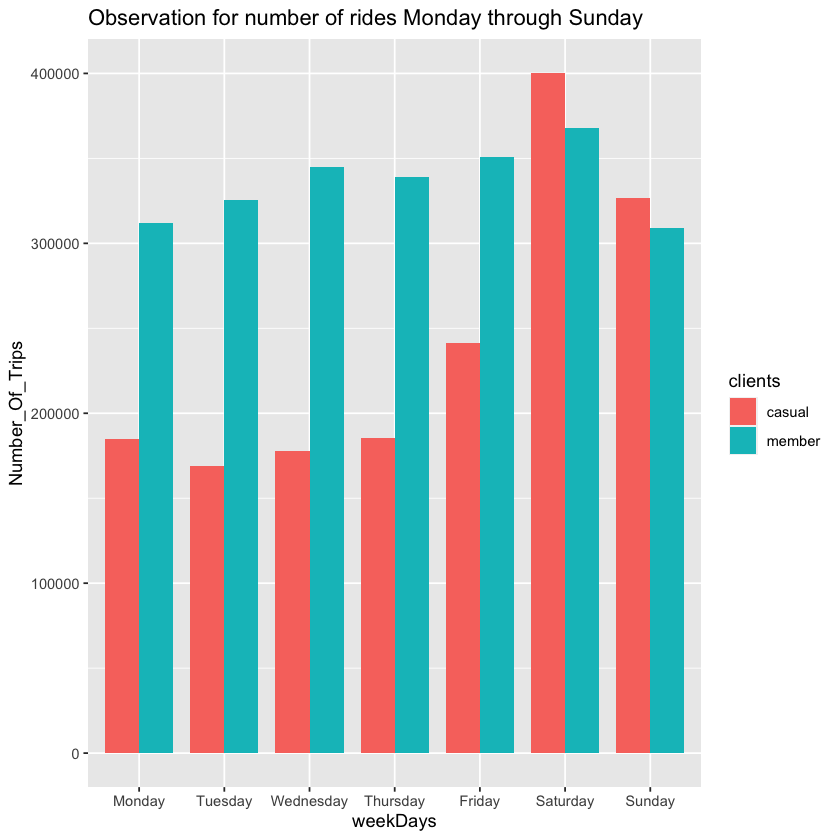

In [153]:
average_weekly_viz <- rides_taken_v2 %>% # Data visualization for the average of weekdays
 group_by(clients, weekDays) %>% 
   summarise(Number_Of_Trips = n(), average_duration = mean(ride_time_secs), .groups="drop") %>%
     ggplot(aes(x = weekDays, y = Number_Of_Trips, fill = clients)) +
     geom_col(width=0.8, position = position_dodge(width=0.8)) +
     labs(title="Observation for number of rides Monday through Sunday")+
     scale_y_continuous(labels = function(x) format(x, scientific = FALSE))
                        
                        
average_weekly_viz # Viz output


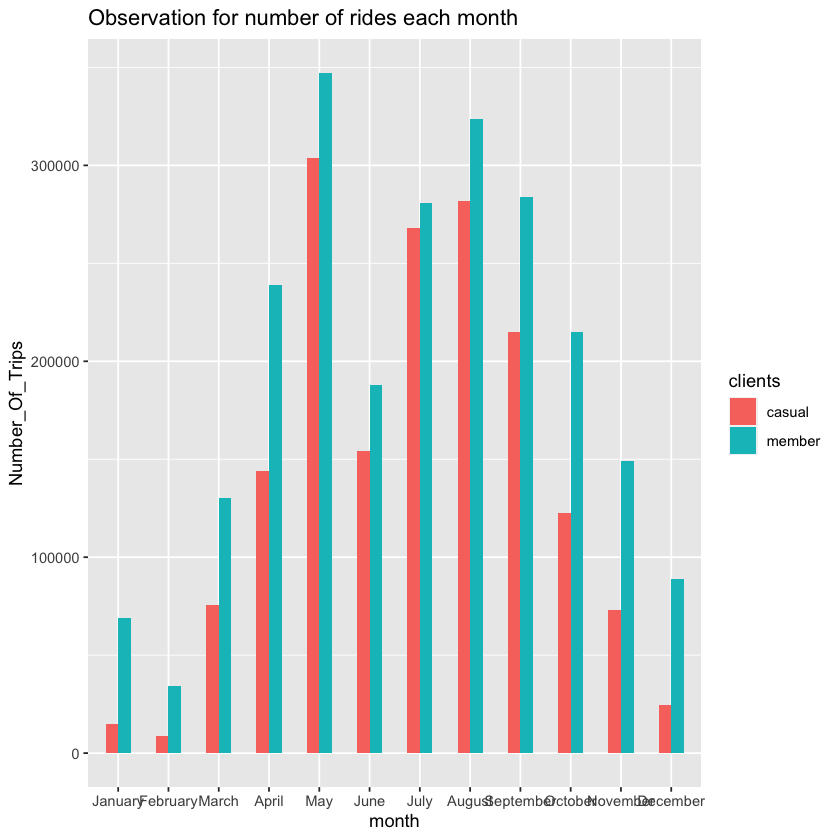

In [154]:
average_monthly_viz <- rides_taken_v2 %>% # Data visualization for the monthly median with customers
 group_by(clients, month) %>% 
   summarise(Number_Of_Trips = n(), average_duration = median(ride_time_secs), .groups="drop") %>%
     ggplot(aes(x = month, y = Number_Of_Trips, fill = clients)) +
     geom_col(width=0.5, position = position_dodge(width=0.5)) +
     labs(title="Observation for number of rides each month")+
     scale_y_continuous(labels = function(x) format(x, scientific = FALSE))
                        
                        
average_monthly_viz # Viz output

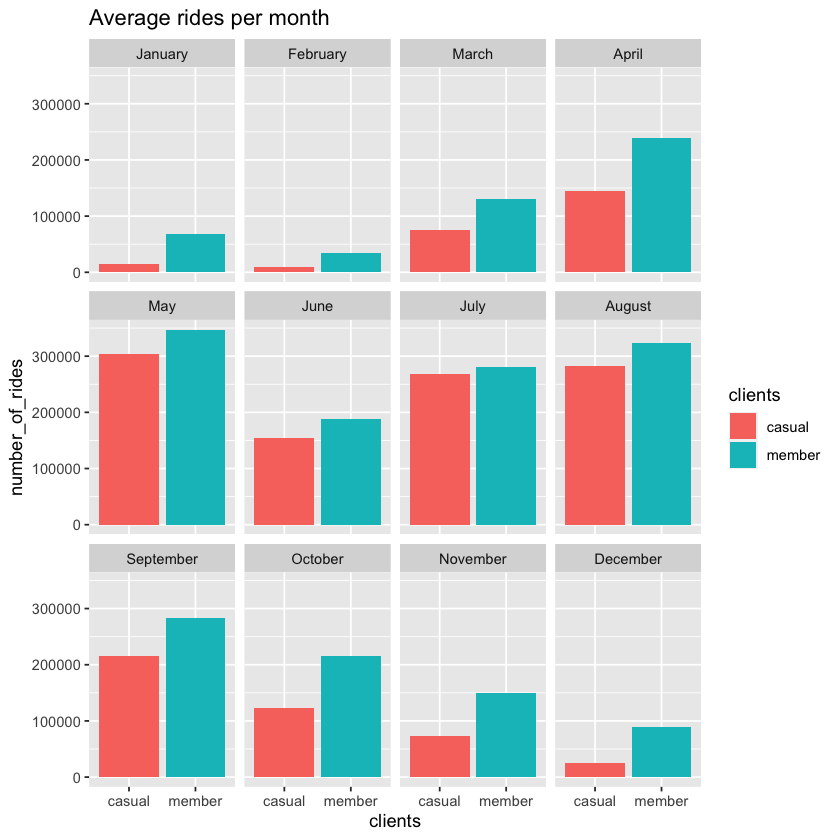

In [155]:
plot_month_viz <- rides_taken_v2 %>% # Data visualization for the monthly mean with customers
 group_by(clients, month) %>% 
 summarise(number_of_rides = n(), average_duration = mean(ride_time_secs), .groups="drop") %>%
  ggplot(mapping=aes(x = clients, y = number_of_rides, fill = clients)) +
  geom_bar(position="dodge2", stat = "identity") +
  facet_wrap(~month) +
  labs(title="Average rides per month")+
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))
                    
plot_month_viz
                   

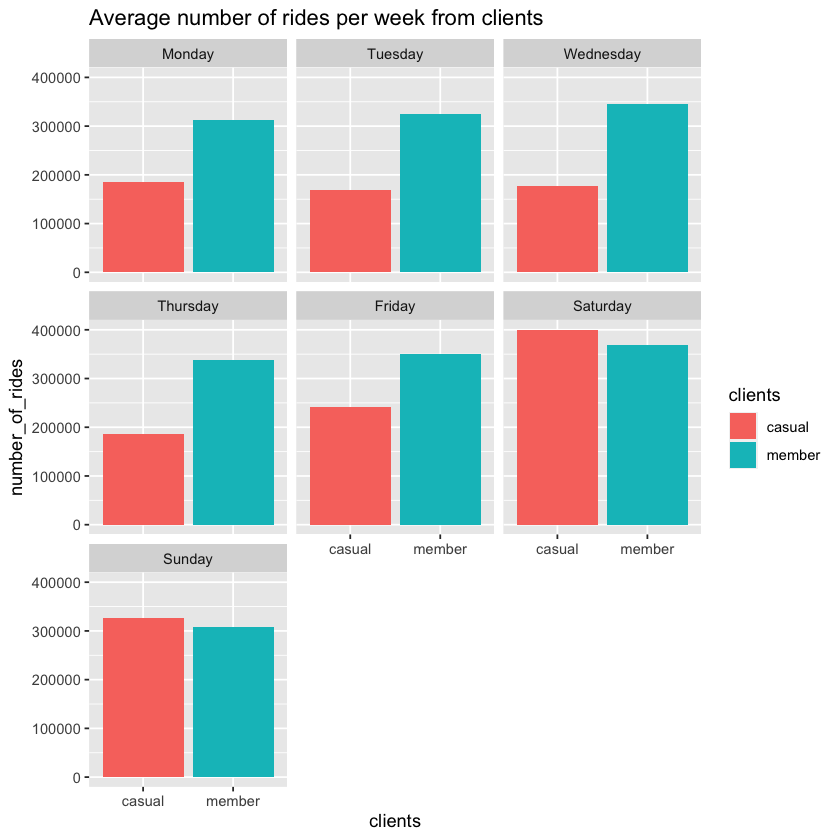

In [157]:
plot_wkday_viz <- rides_taken_v2 %>%
 group_by(clients, weekDays) %>% 
 summarise(number_of_rides = n(), average_duration = mean(ride_time_secs), .groups="drop") %>%
  ggplot(mapping=aes(x = clients, y = number_of_rides, fill = clients)) +
  geom_bar(position="dodge2", stat = "identity") +
  facet_wrap(~weekDays) +
  labs(title="Average number of rides per week from clients")+
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))
                    
plot_wkday_viz
                    

In [129]:
#-----------------------------------------------------------------------------------------------------------------
# STEP # 9 SAVE PLOT AND GRAPH
#-----------------------------------------------------------------------------------------------------------------
ggsave('Days_of_week.png', plot_wkday_viz, width = 15, height=10)

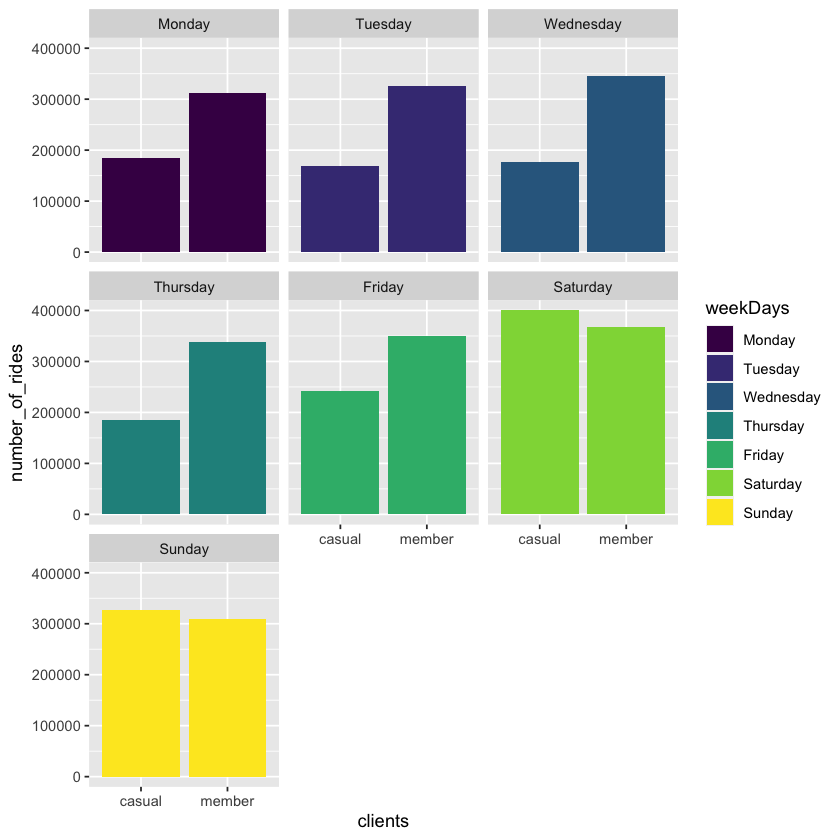

In [159]:
plot_week_viz2 <- rides_taken_v2 %>%
group_by(clients, weekDays) %>% 
summarise(number_of_rides = n(), average_duration = mean(ride_time_secs)/60, .groups="drop") %>%
ggplot(mapping=aes(x = clients, y = number_of_rides, fill = weekDays)) +
  geom_bar(position="dodge2", stat = "identity") +
  facet_wrap(~weekDays) +
 scale_y_continuous(labels = function(x) format(x, scientific = FALSE))
                    
plot_week_viz2 

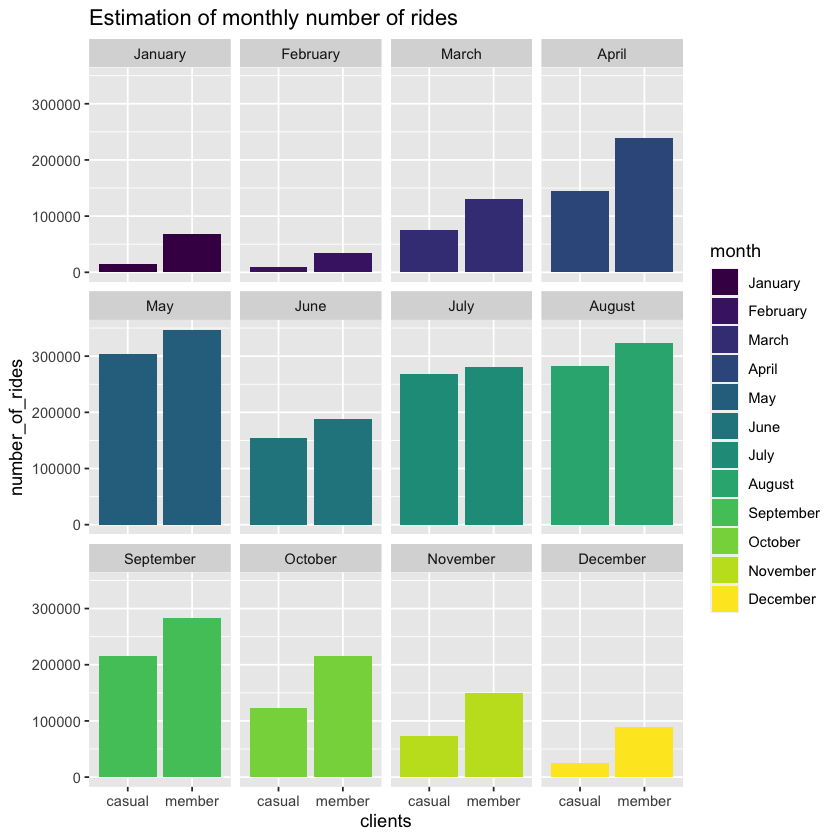

In [158]:
plot_month_viz2 <- rides_taken_v2 %>%
group_by(clients, month) %>% 
summarise(number_of_rides = n(), average_duration = mean(ride_time_secs)/12, .groups="drop") %>%
ggplot(mapping=aes(x = clients, y = number_of_rides, fill = month)) +
  geom_bar(position="dodge2", stat = "identity") +
  facet_wrap(~month) +
 labs(title="Estimation of monthly number of rides")+
 scale_y_continuous(labels = function(x) format(x, scientific = FALSE))
                    
plot_month_viz2 

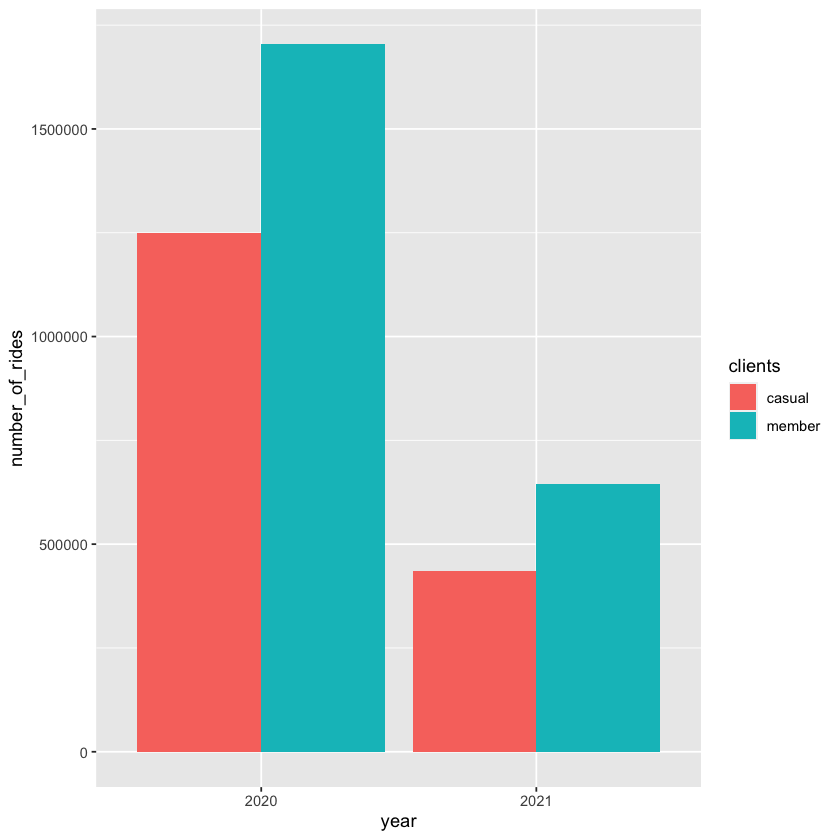

In [213]:
plot_years_viz <- rides_taken_v2 %>%         # viz for 2020 and 2021
group_by(clients, year) %>% 
summarise(number_of_rides = n(), .groups="drop") %>%
ggplot(aes(x = year, y = number_of_rides, fill = clients)) +
  geom_bar(position="Dodge", stat = "identity") +
 scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

                    
plot_years_viz  # years plot

In [ ]:
#-----------------------------------------------------------------------------------------------------------------
# STEP # 10 - SAVE ALL THE DATA TO A CSV FILE
#-----------------------------------------------------------------------------------------------------------------

In [199]:
# New data after cleaning up
clean_data_trips <- setNames(aggregate(ride_time_secs~clients + 
                        weekDays + month + 
                        start_station_name + end_station_name + 
                        rideable, rides_taken_v2, mean),
                        c('riders_type', 'week_days', 'month',  
                          'pick_up_station', 'drop_off_station',
                          'bikes_type','average_rides_duration'))

In [200]:
head(clean_data_trips)

riders_type,week_days,month,pick_up_station,drop_off_station,bikes_type,average_rides_duration
casual,Sunday,January,2112 W Peterson Ave,2112 W Peterson Ave,classic_bike,1056.0
casual,Tuesday,March,2112 W Peterson Ave,2112 W Peterson Ave,classic_bike,890.0
member,Tuesday,March,2112 W Peterson Ave,2112 W Peterson Ave,classic_bike,50.5
casual,Saturday,March,2112 W Peterson Ave,2112 W Peterson Ave,classic_bike,1385.0
member,Saturday,April,2112 W Peterson Ave,2112 W Peterson Ave,classic_bike,3666.0
casual,Thursday,May,2112 W Peterson Ave,2112 W Peterson Ave,classic_bike,1447.0


In [201]:
skim(clean_data_trips)

── Data Summary ────────────────────────
                           Values          
Name                       clean_data_trips
Number of rows             2317184         
Number of columns          7               
_______________________                    
Column type frequency:                     
  character                4               
  factor                   2               
  numeric                  1               
________________________                   
Group variables            None            

── Variable type: character ────────────────────────────────────────────────────
  skim_variable    n_missing complete_rate   min   max empty n_unique whitespace
1 riders_type              0             1     6     6     0        2          0
2 pick_up_station          0             1    10    53     0      711          0
3 drop_off_station         0             1    10    53     0      713          0
4 bikes_type               0             1    11    13     0        3

In [205]:
colSums(is.na(clean_data_trips)) # Total number of members and casual riders after data cleaning
clean_data_trips %>%
  count(riders_type)
      

riders_type              week_days                  month 
                     0                      0                      0 
       pick_up_station       drop_off_station             bikes_type 
                     0                      0                      0 
average_rides_duration 
                     0

riders_type,n
casual,904748
member,1412436


In [186]:
head(rides_taken_v2)

ride_id,rideable,startedTime,endedTime,start_station_name,end_station_name,clients,date,month,day,year,weekDays,time,ride_time_secs,ride_duration_mins
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,2020-04-26,April,26,2020,Sunday,2022-04-14 17:45:00,1609,00:26:49
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,Kosciuszko Park,member,2020-04-17,April,17,2020,Friday,2022-04-14 17:08:00,489,00:08:09
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member,2020-04-01,April,01,2020,Wednesday,2022-04-14 17:54:00,863,00:14:23
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,Wood St & Augusta Blvd,member,2020-04-07,April,07,2020,Tuesday,2022-04-14 12:50:00,732,00:12:12
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual,2020-04-18,April,18,2020,Saturday,2022-04-14 10:22:00,3175,00:52:55
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,member,2020-04-30,April,30,2020,Thursday,2022-04-14 17:55:00,324,00:05:24


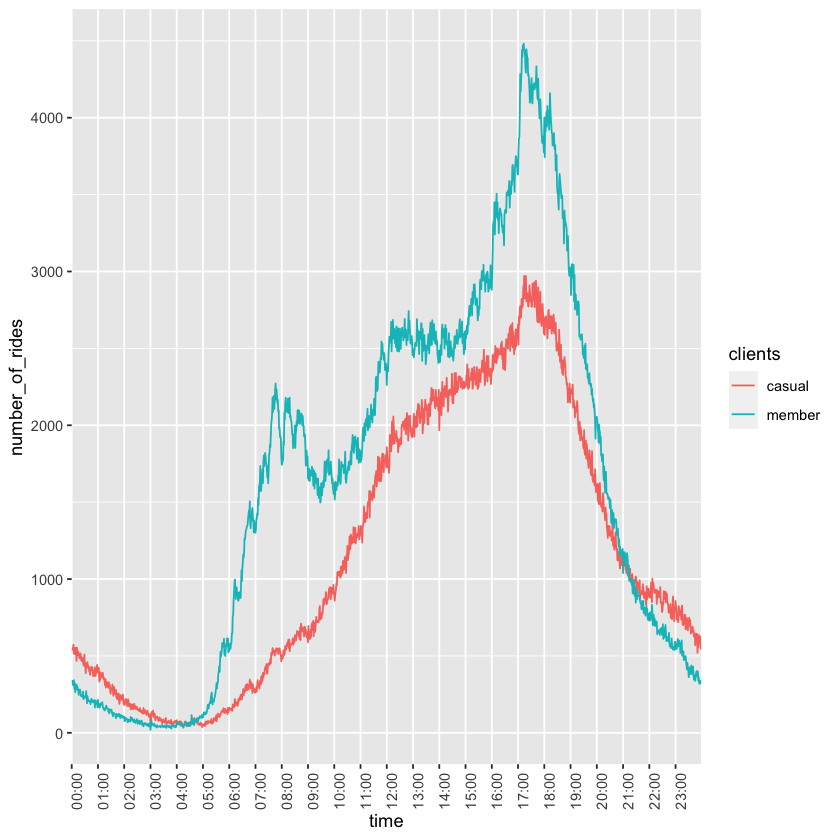

In [174]:
plot_time_day <- rides_taken_v2 %>%   # Viz 1 hour lapse 
  group_by(clients, time) %>% 
  summarise(number_of_rides = n(), .groups="drop") %>%
  ggplot(aes(x = time , y = number_of_rides, color = clients, group = clients)) +
  geom_line() +
scale_x_datetime(date_breaks = "1 hour", minor_breaks = NULL,
                   date_labels = "%H:%M", expand = c(0,0)) +
  theme(axis.text.x = element_text(angle = 90))

 
plot_time_day 

In [210]:
glimpse(clean_data_trips)

Rows: 2,317,184
Columns: 7
$ riders_type            <chr> "casual", "casual", "member", "casual", "member…
$ week_days              <ord> Sunday, Tuesday, Tuesday, Saturday, Saturday, T…
$ month                  <ord> January, March, March, March, April, May, May, …
$ pick_up_station        <chr> "2112 W Peterson Ave", "2112 W Peterson Ave", "…
$ drop_off_station       <chr> "2112 W Peterson Ave", "2112 W Peterson Ave", "…
$ bikes_type             <chr> "classic_bike", "classic_bike", "classic_bike",…
$ average_rides_duration <dbl> 1056.0000, 890.0000, 50.5000, 1385.0000, 3666.0…


In [209]:
# Create a new csv file to visualize in Excel, Tableau, or presentation 
write.csv(clean_data_trips, "2020-2021_chicago_bike_rides_data_clean.csv") 
